# Part 1: Implementing Logistic Regression from Scratch

In this part of the lab, you will be requested to implement logistic regression from scratch. This means you will need to make use of gradient descent to find the parameters of the model.


In [518]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score

In [519]:
def plot_loss(title, values):
    '''
    This function will allow us to check the evolution of the loss function during gradient descent
    Inputs:
    Title - title of the plot
    Values - values to be plotted
    '''
    plt.figure(figsize=(3, 3))
    plt.plot(values)
    plt.title(title)
    plt.ylabel('loss')
    plt.xlabel('iteration')
    plt.show()

For this exercise, we will make use of the function [make_classification](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) from scikit-learn, which generates random data for an k-class classification problem. We will use k=2 to stick to a binary classification problem.

In [520]:
X, y = make_classification(n_features=10, n_redundant=0, n_informative=6, n_classes=2, n_clusters_per_class=1)

## Question 1: make_classification
Check the documentation of the function to determine what is the role of the following parameters:

    1. n_redundant
    2. n_informative
    3. n_repeated

Based on your findings, how many useless features does the dataset contain?

### Question 1
**n_features:int, default=20**
The total number of features. These comprise `n_informative` informative features, `n_redundant` redundant features, `n_repeated` duplicated features and `n_features-n_informative-n_redundant-n_repeated` useless features drawn at random.

Based on this that we found on the documentation, we can say that the number of useless features is 10 - 6 - 0 - 0 = 4. (`n_repeated` by default is 0)

## Exercise 1: Scaling input features
When different input features have extremely different ranges of values, it is common to rescale them so they have comparable ranges. We standardize input values by centering them to result in a zero mean and a standard deviation of one (this transformation is sometimes called the z-score). That is, if $\mu_j$ is the mean of the values of the j-th feature across the N samples in the input dataset, and $\sigma_j$ is the standard deviation of the values of features j-th across the input dataset, we can replace each feature $x_i^j$ by a new feature $x^{'j}_i$ computed as follows:

$$\mu_j = \frac{1}{N}\sum^{N}_{i=1} x_i^j$$

$$\sigma_j = \sqrt{\frac{1}{N}\sum^{N}_{i=1} x_i^j - \mu_j)^2} $$

$$x^{'j}_i = \dfrac{x_i^j - \mu_j}{\sigma_j}$$

### Task 1.1: Implement feature scaling
Implement below the function standardize, which estimates the mean and standard deviation of each feature in the dataset and then standardizes all the input features.

**Hint:** Check the documentation of the functions mean, std and divide from numpy.

In [521]:
def standardize(X, mean = None, stdev = None):
    '''
    Transforms the input data using the z-score. 
    If the mean and stdev are provided, the function only performs the transformation.
    Otherwise, it first estimates the mean and standard deviation
    Inputs:
    X- Data to standardize
    mean - vector with means of each feature (default None)
    stdev - vector with standard deviation of each feature (default None)
    Outputs:
    X_stand - Standardized data
    mean - Mean of the data
    stdev - standard deviation of the data
    '''
    if mean is None:
        mean = np.mean(X, axis = 0).reshape(1, X.shape[1])
    if stdev is None:
        stdev = np.std(X, axis = 0).reshape(1, X.shape[1])
    X_stand = (X - mean) / stdev
    
    
    return X_stand, mean, stdev

## Exercise 2: Implementing and Running Logistic Regression
### Task 2.1: Implement Logistic Regression
Below you will see the skeleton of the Logistic Regression class. Some of its functions have already been implemented. Have a look at them and try to understand them.

Afterwards, you will need to complete the following:

1. **function sigmoid** - Computes the sigmoid function given an input (*see slide 15 of the Logistic Regression slide deck*)

2. **function loss_function** - Estimates the cross-entropy loss given an input matrix X, a vector of labels y and the weights. Attention: In the course's slides, we estimated the loss by suming over all elements of the training set. For efficiency purposes, estimate it using matrix/vector computations. You may have a look into the linear regression lab for inspiration on how to do this

3. **function gradient_descent_step** - Performs an update of the weights for logistic regression. Using matrix notation this is expressed as:
$$ \mathbf{w}^{(\tau+1)} = \mathbf{w}^{(\tau)} + \dfrac{\alpha}{N}\mathbf{X}^T\left(\mathbf{y}-\sigma\left(\mathbf{X}\mathbf{w}\right)\right)$$

4. **function prediction** - Predicts new labels y_pred given an input matrix (*see slide 24 from Logistic regression slide deck*)


In [522]:
class LogisticRegression:
    
    def initialize_weights(self,X):
        '''
        Initializes the parameters so that the have the same dimensions as the input data + 1
        Inputs:
        X - input data matrix of dimensions N x D
        
        Outputs:
        weights - model parameters initialized to zero size (D + 1) x 1
        '''
        weights = np.zeros((X.shape[1]+1,1))
        
        return weights
    
    def initialize_X(self,X):
        '''
        Reshapes the input data so that it can handle w_0
        Inputs:
        X - input data matrix of dimensions N x D
        Outputs:
        X - matrix of size N x (D + 1)
        '''
        X = PolynomialFeatures(1).fit_transform(X) #Adds a one to the matrix so it copes with w_0
        
        return X
    
    def sigmoid(self,z):
        '''
        Implements the sigmoid function
        Input:
        z - input variable 
        
        Output:
        1/(1+exp(-z))
        '''
        sig = 1/(1+np.exp(-z))
        return sig
        
    def loss_function(self,X,y,w):
        '''
        Implements the cross-entropy loss. See Eq 1, Slide 21 from the Logistic Regression slide deck as a reminder.
        Note that the expression in slide 21 is not using a matrix notation. 
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        w - Parameters vector of size (D + 1) x 1
        
        Output: 
        Estimation of the cross-entropy loss given the input, labels and parameters (scalar value)
        '''
        
        #1) Estimate Xw
        Xw = np.dot(X, w)
        
        
        #2) Estimate sigmoid of Xw
        sigmoid = self.sigmoid(Xw)
        
        #3) estimate log(sig) and log(1-sig)
        log1 = np.log(sigmoid)
        log2 = np.log(1 - sigmoid)
        
        #4) Combine point 3 with the labels and sum over all elements to obtain the final estimate
        loss =  - np.sum(y * log1 + (1 - y) * log2) 
        
        return loss
    
    def gradient_descent_step(self,X, y, w, alpha):
        '''
        Implements a gradient descent step for logistic regression
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        w - Parameters vector of size (D + 1) x 1
        alpha - Learning rate 
        Output: 
        Updated weights
        '''
        
        w = w + alpha/len(y) * np.dot(X.T, y - self.sigmoid(np.dot(X, w)))
        
        return w
    
    def fit(self,X,y,alpha=0.01,iter=10, epsilon = 0.0001):
        '''
        Learning procedure of the logistic regression model
        Input:
        X - Input matrix of size N x (D + 1)
        y - Label vector of size N x 1
        alpha - Learning rate (default value 0.01)
        iter - Number of iterations to perform for gradient descent (default 10)
        epsilon - stopping criterion (default 0.0001)
        Output: 
        List of values of the loss function during the gradient descent iterations
        '''
        weights = self.initialize_weights(X) #Initializes the weights of the model
        X = self.initialize_X(X) #reformats X
        
        
        loss_list = np.zeros(iter,) # We will store the values of the loss function as gradient descent advances
        
        for i in range(iter):
            weights = self.gradient_descent_step(X, y, weights, alpha)
            
            loss_list[i] = self.loss_function(X,y,weights)
            
            if loss_list[i] <= epsilon:
                break
            
        self.weights = weights
        
        return loss_list
    
    def predict(self,X):
        '''
        Predicts labels y given an input matrix X
        Input: 
        X- matrix of dimensions N x D
        
        Output:
        y_pred - vector of labels (dimensions N x 1)
        '''
        #1) Reformat the matrix X
        X = self.initialize_X(X)
        
        #2) Estimate Xweights
        Xweights = np.dot(X, self.weights)

        
        #3) Use slide 24 from the slide deck to assign the labels y
        y_pred = np.zeros(Xweights.shape)
        y_pred[Xweights > 0] = 1
        
        return y_pred.astype(int)
        

We are now ready to test your implementation of Logistic Regression. Go through the different steps below and understand what exactly is being done. 

In [523]:
#First we split the data into two sets: training and testing (no validation set in this lab)
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1)

# Next we standardize the training set
X_tr, mean, std = standardize(X_tr)

# The test input features are standardized using the mean and std computed on the training set 
X_te, _, _ = standardize(X_te, mean, std)

#We initialize the logistic regression class
logistic = LogisticRegression() 

y_tr = y_tr.reshape((len(X_tr),1))
y_te = y_te.reshape((len(X_te),1))
#We fit the model using a learning rate of 0.01 and 500 iterations
values = logistic.fit(X_tr,y_tr, 0.01, 500)      

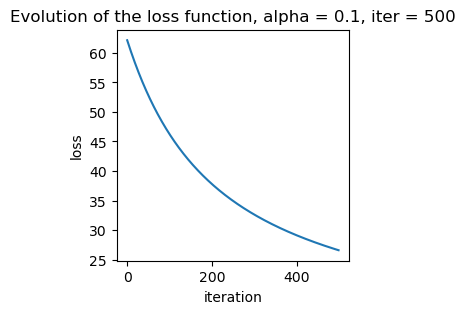

In [524]:
plot_loss('Evolution of the loss function, alpha = 0.1, iter = 500', values)

Now, we estimate labels for the training and the testing dataset. Then we will assess the performance using the [F1-score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [525]:
y_train_pred = logistic.predict(X_tr)
y_test_pred = logistic.predict(X_te)

print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

Performance in the training set:0.9285714285714285

Performance in the test set:0.888888888888889



How does your model perform? Are you satisfied? Comment

By running code multiple times we can see that our performance varies(the data generated for training and test changes at each run). This may be caused by the fact that we did not make an optimal choice of hyper parameters (learning rate and number of iterations).

### Task 2.2: Varying the learning rate and the number of iterations
Run multiple times the fit function, using different values of the learning rate (0.001 and 0.1) and the iterations (500 and 1000). Comment on your results.

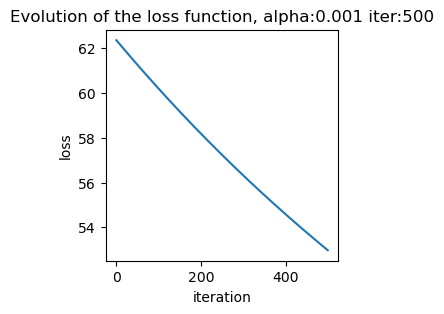

alpha:  0.001 iter:  500
Performance in the training set:0.9024390243902439

Performance in the test set:0.888888888888889



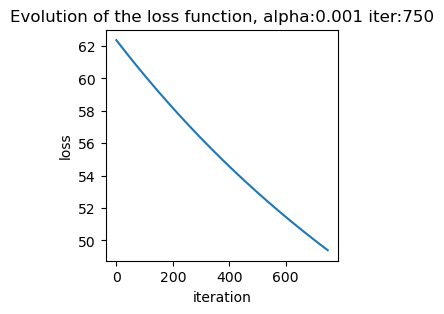

alpha:  0.001 iter:  750
Performance in the training set:0.9024390243902439

Performance in the test set:0.888888888888889



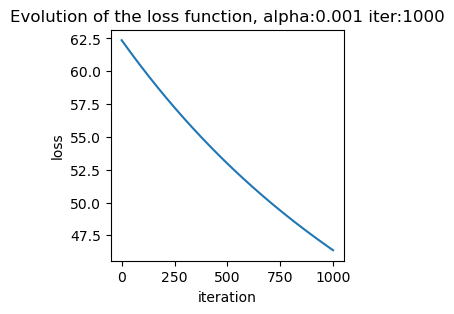

alpha:  0.001 iter:  1000
Performance in the training set:0.9156626506024097

Performance in the test set:0.888888888888889



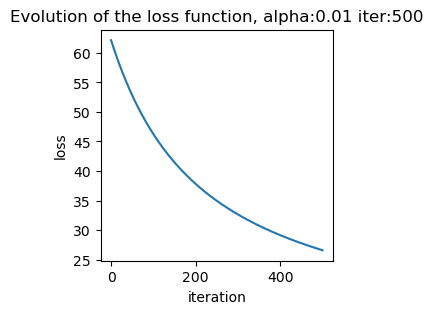

alpha:  0.01 iter:  500
Performance in the training set:0.9285714285714285

Performance in the test set:0.888888888888889



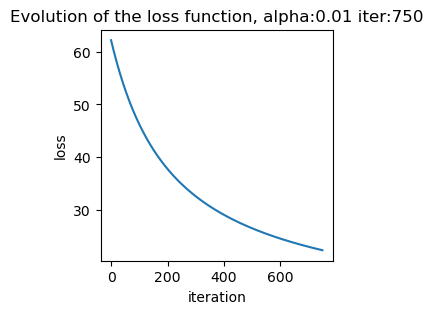

alpha:  0.01 iter:  750
Performance in the training set:0.9285714285714285

Performance in the test set:0.888888888888889



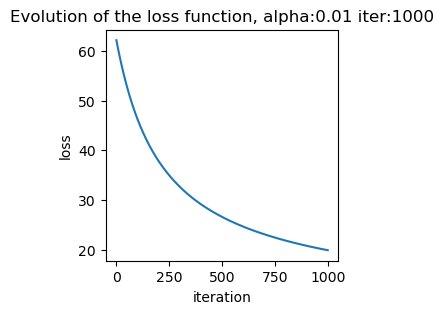

alpha:  0.01 iter:  1000
Performance in the training set:0.9285714285714285

Performance in the test set:0.888888888888889



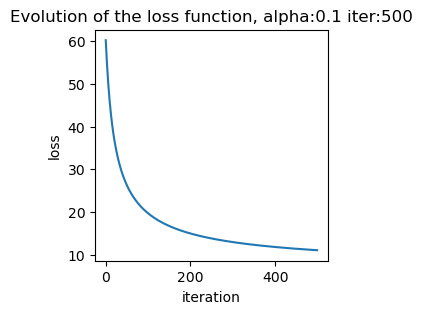

alpha:  0.1 iter:  500
Performance in the training set:0.9534883720930233

Performance in the test set:0.888888888888889



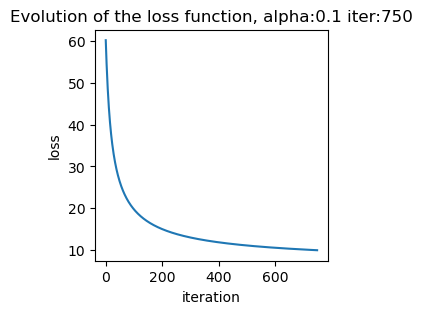

alpha:  0.1 iter:  750
Performance in the training set:0.9534883720930233

Performance in the test set:0.888888888888889



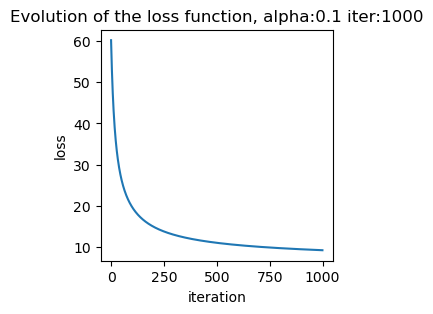

alpha:  0.1 iter:  1000
Performance in the training set:0.9655172413793104

Performance in the test set:0.888888888888889



In [526]:
for alpha in [0.001, 0.01, 0.1]:
    for iter in [500, 750, 1000]:
        values = logistic.fit(X_tr,y_tr, alpha, iter)
        plot_loss('Evolution of the loss function, alpha:'+str(alpha)+' iter:'+str(iter), values)
        y_train_pred = logistic.predict(X_tr)
        y_test_pred = logistic.predict(X_te)
        print ("alpha: ", alpha, "iter: ", iter)
        print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
        print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')   

Comment on the obtained curves. How does the behavior of the loss changes?

By running multiple times varying alpha and iter, we can see that the loss function converges faster when alpha is bigger. This is because the gradient descent step is bigger and the algorithm converges faster. However, if alpha is too big, the algorithm may even diverge.
We can also see that, fixing alpha (this is easier to see with low alpha values, e.g. 0.001), as the number of iteration rises, the loss function tends to get closer to the optimal value. However, if we set a big enough number of iterations it may also happen that the algorithm stops because of the stopping criterion rather than because of reaching the maximum number of iterations.

## Optional Exercise: Changing the Properties of the Data (Bonus point)
Play around with the make_classification function by varying the number of redundant, repeated and informative features. For each new dataset you generate, train the logistic regression classifier. Comment on the results you obtained. What happens when there are too many redundant and/or repeated features? Too many random ones? How does the number of informative features affect the quality of the classifier?

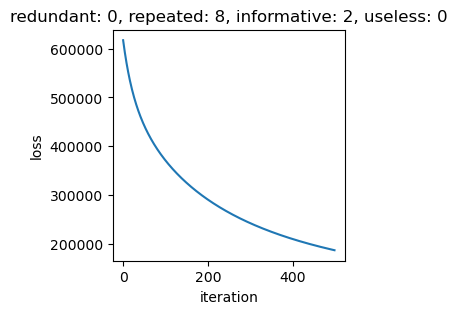

weights [[ 0.00923579  0.40106804  0.40106804  0.40106804 -0.46716336  0.40106804
   0.40106804 -0.46716336  0.40106804 -0.46716336  0.40106804]]
Performance in the training set:0.9697546493589858

Performance in the test set:0.9692371084288915



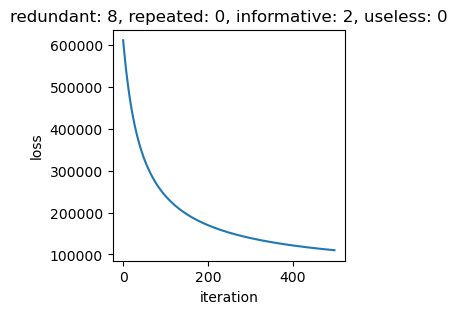

weights [[-0.00247486  0.09001833 -0.51435452 -0.42165551  0.60447958 -0.14853071
  -0.56520237 -0.24235339  0.25594613  0.40587499 -0.52458865]]
Performance in the training set:0.9815813421445538

Performance in the test set:0.9811771022879814



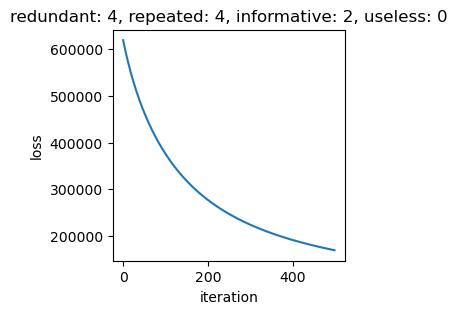

weights [[-0.00451642  0.21218413 -0.20000735  0.15200828 -0.60673426 -0.66654953
  -0.60673426 -0.20000735  0.58528475  0.58528475  0.15200828]]
Performance in the training set:0.9837896154054475

Performance in the test set:0.983718152866242



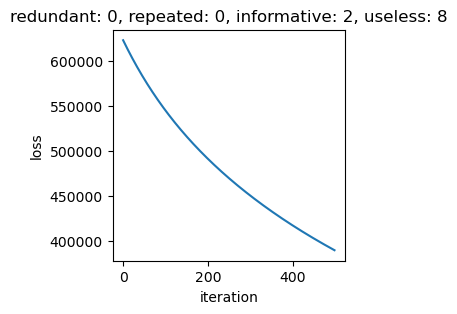

weights [[ 8.59899060e-04  1.59149879e-03  7.25702896e-06 -2.12059288e-03
  -3.09551780e-04  1.59285418e-03  1.05551465e+00 -2.34012444e-03
  -1.98142565e-03  1.95357656e-03 -3.25068658e-01]]
Performance in the training set:0.9139468545564164

Performance in the test set:0.9153625233032701



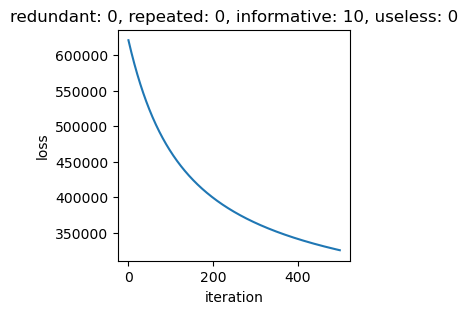

weights [[-0.03981294  0.46833187 -0.60563702 -0.15136304  0.17018275  0.52383763
  -0.03095969  0.52685269  0.02946075 -0.38204006  0.05772552]]
Performance in the training set:0.8944479455311657

Performance in the test set:0.8941924180862564



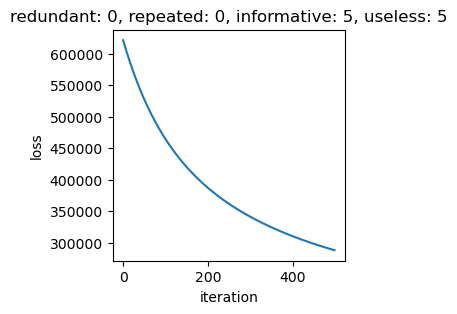

weights [[ 3.12714530e-03 -1.55645229e-04  2.06032104e-01  1.52207229e-01
   1.96596102e-03 -7.36646467e-01 -3.33782793e-03 -4.24771989e-04
   7.65992211e-01 -6.42752772e-01  4.62828173e-04]]
Performance in the training set:0.919235293725219

Performance in the test set:0.9195927737299131



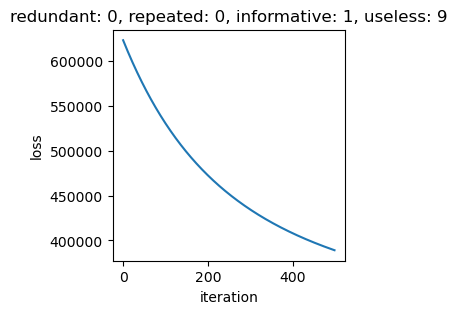

weights [[ 2.00146877e-04 -1.20157441e-03 -6.58855664e-04  5.89803066e-04
  -4.55382438e-04 -1.24414757e-03 -4.10634971e-04 -4.60788895e-04
  -1.10844179e-03  1.09693832e+00 -7.70955253e-04]]
Performance in the training set:0.85449217018107

Performance in the test set:0.8528660314406806



In [528]:
redundant = [0, 8, 4, 0, 0, 0, 0]
repeated = [8, 0, 4, 0, 0, 0, 0]
informative = [2, 2, 2, 2, 10, 5, 1]
for i in range(7):
    X, y = make_classification(n_features=10, n_redundant=redundant[i], n_informative=informative[i], n_repeated=repeated[i], n_classes=2, n_clusters_per_class=1, random_state=20, n_samples=1000000)
    #First we split the data into two sets: training and testing (no validation set in this lab)
    X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size=0.1, random_state=20)

    # Next we standardize the training set
    X_tr, mean, std = standardize(X_tr)

    # The test input features are standardized using the mean and std computed on the training set 
    X_te, _, _ = standardize(X_te, mean, std)

    #We initialize the logistic regression class
    logistic = LogisticRegression() 

    y_tr = y_tr.reshape((len(X_tr),1))
    y_te = y_te.reshape((len(X_te),1))
    #We fit the model using a learning rate of 0.01 and 500 iterations
    values = logistic.fit(X_tr,y_tr, 0.01, 500) 

    # print weights
    plot_loss('redundant: '+str(redundant[i])+', repeated: '+str(repeated[i])+', informative: '+str(informative[i])+', useless: '+ str(10 - informative[i] - redundant[i] - repeated[i]), values)
    print("weights",logistic.weights.T)
    y_train_pred = logistic.predict(X_tr)
    y_test_pred = logistic.predict(X_te)

    print(f'Performance in the training set:{f1_score(y_tr, y_train_pred)}\n')
    print(f'Performance in the test set:{f1_score(y_te, y_test_pred)}\n')

# Bonus point
Starting from the fact that to train a good model, we need an high number of samples with respect to the dimensionality of the samples (thus an high ratio N_samples/Dimensionality), we can say these things about the variation on the number of redundant, repeated and informative features:
## Many repeated features
Given **total_features=n_repeated+n_informative**, starting from 10 informative features (so total=10), if we sequentially decrease the **informatives**, adding **repeated features**, the performance of the model decreases. This is because the model puts the same effort as it would put with samples with 10 dimensions, while our samples actually carry only **n_total-n_repeated** dimensions of discriminant information.


## Many redundant features
Given **total_features=n_redundant+n_informative**, starting from 10 informative features (so total=10), if we sequentially decrease the **informatives**, adding **redundant features**, the performance of the model **decreases**.
This is because the model puts the same effort as it would put to with samples with 10 dimensions (thus we have the problem of the low ratio N_samples/Dimensions), while our samples actually carry only **n_informative-n_redundant** dimensions of discriminant information.

In addition to this, with redundant features, we also add correlations between data, making it harder for our model to estimate the parameters.

In general, we would expect worse results than in the case of repeated features but, in our case (see the weights obtained with 8 redundants and 2 informatives), the model treats the redundant features as random ones (they have very low weights), thus managing to estimate the parameters better.

If, for example, we highly increase the number of training samples, this does not hold anymore and the model performs better (the ratio N_samples/Dimensions is higher). This is valid also for the case of repeated features.

## Many random/useless features
If we add many random features (e.g. 9 random features and 1 informative feature), the performance of our model does not decrease. This is because the model manages to ignore the random features and focus on the informative one, thus managing to estimate it better, because of the higher ratio between informative features and total number of samples.

